# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

caminho_dados = "/content/drive/MyDrive/Colab Notebooks/MODULO7_PROJETOFINAL_BASE_SUPERMERCADO - MODULO7_PROJETOFINAL_BASE_SUPERMERCADO (1).csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv(caminho_dados)

df.head(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [6]:
# Traduzindo as categorias
traducao_dict = {
    'belleza-y-cuidado-personal': 'beleza e cuidado pessoal',
    'comidas-preparadas': 'refeições preparadas',
    'congelados': 'congelados',
    'frutas': 'frutas',
    'instantaneos-y-sopas': 'instantâneos e sopas',
    'lacteos': 'laticínios',
    'verduras': 'verduras'
}

df['Categoria'] = df['Categoria'].replace(traducao_dict)

# Exibição do resultado após a tradução
display(df['Categoria'].unique())

array(['laticínios', 'beleza e cuidado pessoal', 'congelados', 'frutas',
       'refeições preparadas', 'verduras', 'instantâneos e sopas'],
      dtype=object)

In [7]:
media_preco_por_categoria = df.groupby('Categoria')['Preco_Normal'].mean().round(2)
display(media_preco_por_categoria)

,Preco_Normal
Categoria,
beleza e cuidado pessoal,1783.56
congelados,2108.04
frutas,1724.47
instantâneos e sopas,765.49
laticínios,2385.22
refeições preparadas,3095.04
verduras,1343.30


In [8]:
mediana_preco_por_categoria = df.groupby('Categoria')['Preco_Normal'].median()
display(mediana_preco_por_categoria)

,Preco_Normal
Categoria,
beleza e cuidado pessoal,1569.0
congelados,1519.0
frutas,1195.0
instantâneos e sopas,439.0
laticínios,989.0
refeições preparadas,3290.0
verduras,1180.0


In [9]:
# Identificando categorias com média acima ou abaixo da mediana
categorias_media_acima_mediana = media_preco_por_categoria[media_preco_por_categoria > mediana_preco_por_categoria].index.tolist()
categorias_media_abaixo_mediana = media_preco_por_categoria[media_preco_por_categoria < mediana_preco_por_categoria].index.tolist()

print("Categorias onde a média está acima da mediana:")
print(categorias_media_acima_mediana)

print("\nCategorias onde a média está abaixo da mediana:")
print(categorias_media_abaixo_mediana)

Categorias onde a média está acima da mediana:
['beleza e cuidado pessoal', 'congelados', 'frutas', 'instantâneos e sopas', 'laticínios', 'verduras']

Categorias onde a média está abaixo da mediana:
['refeições preparadas']


Digite aqui as categorias:

# Resposta:
Categorias onde a **média está acima da mediana**:'beleza e cuidado pessoal', 'congelados', 'frutas', 'instantâneos e sopas', 'laticínios', 'verduras'.

Categorias onde a **média está abaixo da mediana**: 'refeições preparadas'.



# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [10]:
# Calcular o desvio padrão por categoria
desvio_padrao_por_categoria = df.groupby('Categoria')['Preco_Normal'].std().round(2)
display(desvio_padrao_por_categoria)

,Preco_Normal
Categoria,
beleza e cuidado pessoal,2210.04
congelados,2111.54
frutas,1639.15
instantâneos e sopas,1170.23
laticínios,3925.82
refeições preparadas,2019.91
verduras,1012.70


Digite nesse campo o comportamento que você identificou.

# Resposta:
Nas categorias com maior desvio padrão ('laticínios', 'beleza e cuidado pessoal', 'congelados'), a média tende a ser maior que a mediana. Isso sugere que, nessas categorias, os preços mais altos puxam a média para cima, indicando uma possível presença de outliers de preços mais elevados.



# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

> Adicionar aspas



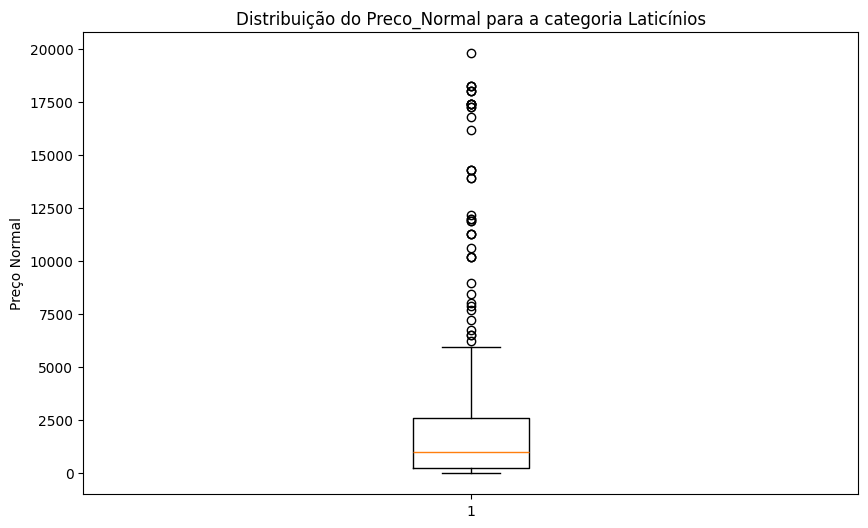

In [11]:
# Filtrar os dados para a categoria com maior desvio padrão ('laticínios')
df_laticinios = df.loc[df['Categoria'] == 'laticínios']

# Plotar o boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(df_laticinios['Preco_Normal'])
plt.title('Distribuição do Preco_Normal para a categoria Laticínios')
plt.ylabel('Preço Normal')
plt.show()

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

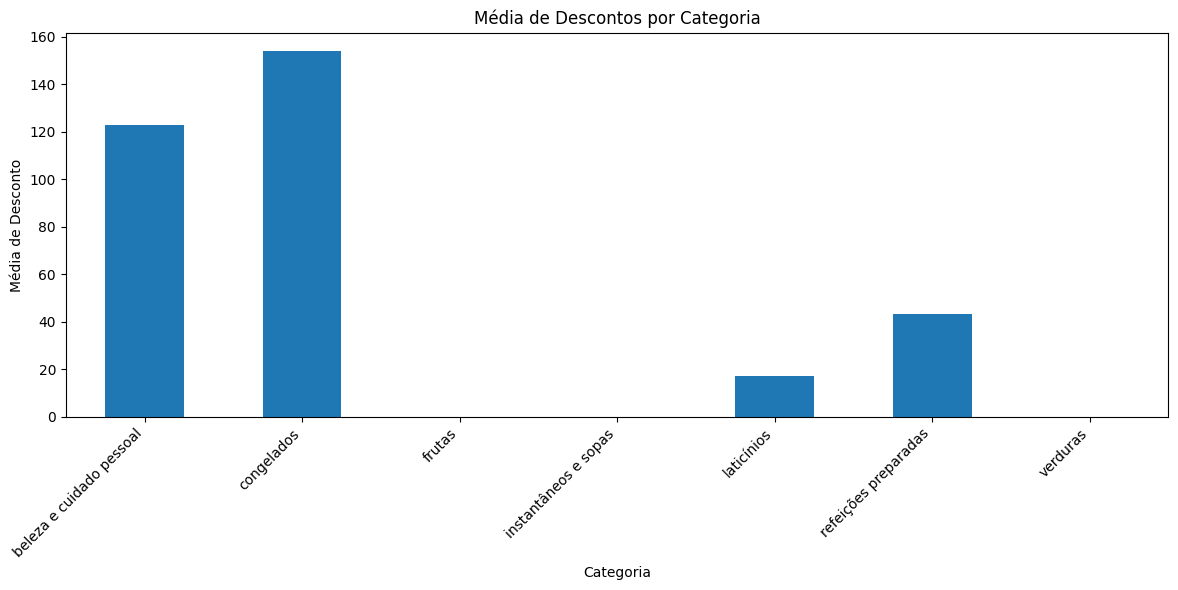

In [15]:
# Calcular a média de descontos por categoria
media_desconto_por_categoria = df.groupby('Categoria')['Desconto'].mean().round(2)

# Plotar o gráfico de barras
plt.figure(figsize=(12, 6))
media_desconto_por_categoria.plot(kind='bar')
plt.title('Média de Descontos por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Média de Desconto')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

In [19]:
# Calcular a média de desconto por categoria e marca
media_desconto_categoria_marca = df.groupby(['Categoria', 'Marca'])['Desconto'].mean().reset_index()

# Preencha todos os valores NaN potenciais em 'Desconto' com 0 para lidar com casos sem descontos
media_desconto_categoria_marca['Desconto'] = media_desconto_categoria_marca['Desconto'].fillna(0)

# Adicione uma pequena constante para evitar ZeroDivisionError na normalização do mapa de árvore
media_desconto_categoria_marca['Desconto'] = media_desconto_categoria_marca['Desconto'] + 1e-9

# Criar o treemap interativo
fig = px.treemap(
    media_desconto_categoria_marca,
    path=['Categoria', 'Marca'],  # Define a hierarquia (Categoria -> Marca)
    values='Desconto',  # Define o tamanho das caixas pelo valor do desconto
    color='Desconto',  # Define a cor das caixas pelo valor do desconto
    hover_data={'Desconto': ':.2f'}, # Format the discount in hover to 2 decimal places
    title="Média de Desconto por Categoria e Marca"
)

fig.show()